- pip install requests
- pip install beautifulsoup4
- pip install selenium

In [11]:
import requests as req

r = req.get("https://webscraper.io/test-sites/e-commerce/allinone/computers/tablets")
print(r.status_code)

200


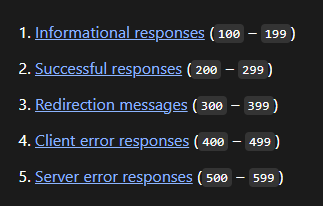

In [12]:
# print(r.text)

In [13]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.text)
# print(soup)

In [14]:
soup = BeautifulSoup(r.text , "lxml")
# print(soup)

In [15]:
# print(soup.div.ul)
print(soup.div.a)

<a data-bs-target=".side-collapse" data-bs-target-2=".side-collapse-container" data-bs-toggle="collapse-side">
<button aria-controls="navbar" aria-expanded="false" class="navbar-toggler float-end collapsed" data-bs-target="#navbar" data-bs-target-2=".side-collapse-container" data-bs-target-3=".side-collapse" data-bs-toggle="collapse" type="button">
<span class="visually-hidden">Toggle navigation</span>
<span class="icon-bar top-bar"></span>
<span class="icon-bar middle-bar"></span>
<span class="icon-bar bottom-bar"></span>
<span class="icon-bar extra-bottom-bar"></span>
</button>
</a>


In [16]:
tag = soup.header.a 
print(tag.string)

None


In [17]:
price = soup.find('h4' , {'class' : 'float-end price card-title pull-right'})
print(price.string)

$69.99


In [18]:
title = soup.find('a' , {'class' : 'title'})
print(title.string)

Lenovo IdeaTab


In [19]:
desc = soup.find('p' , {'class' : 'description card-text'})
print(desc.string)

7" screen, Android


In [20]:
price = soup.find_all('h4' , {'class' : 'float-end price card-title pull-right'})
print(len(price))
for i in price:
    print(i.string) 

21
$69.99
$88.99
$96.99
$97.99
$99.99
$101.99
$102.99
$103.99
$107.99
$121.99
$130.99
$148.99
$172.99
$233.99
$251.99
$320.99
$399.99
$489.99
$537.99
$587.99
$603.99


In [21]:
title = soup.find_all('a' , {'class' : 'title'})
for i in title:
    print(i.string) 

Lenovo IdeaTab
IdeaTab A3500L
Acer Iconia
Galaxy Tab 3
Iconia B1-730H...
Memo Pad HD 7
Asus MeMO Pad
Amazon Kindle
Galaxy Tab 3
IdeaTab A8-50
MeMO Pad 7
IdeaTab A3500-...
IdeaTab S5000
Galaxy Tab 4
Galaxy Tab
MeMo PAD FHD 1...
Galaxy Note
Galaxy Note
iPad Mini Reti...
Galaxy Note 10...
Apple iPad Air


In [22]:
desc = soup.find_all('p' , {'class' : 'description card-text'})
for i in desc:
    print(i.string) 

7" screen, Android
Black, 7" IPS, Quad-Core 1.2GHz, 8GB, Android 4.2
7" screen, Android, 16GB
7", 8GB, Wi-Fi, Android 4.2, White
Black, 7", 1.6GHz Dual-Core, 8GB, Android 4.4
IPS, Dual-Core 1.2GHz, 8GB, Android 4.3
7" screen, Android, 8GB
6" screen, wifi
7", 8GB, Wi-Fi, Android 4.2, Yellow
Blue, 8" IPS, Quad-Core 1.3GHz, 16GB, Android 4.2
White, 7", Atom 1.2GHz, 8GB, Android 4.4
Blue, 7" IPS, Quad-Core 1.3GHz, 8GB, 3G, Android 4.2
Silver, 7" IPS, Quad-Core 1.2Ghz, 16GB, 3G, Android 4.2
LTE (SM-T235), Quad-Core 1.2GHz, 8GB, Black
16GB, White
White, 10.1" IPS, 1.6GHz, 2GB, 16GB, Android 4.2
10.1", 3G, Android 4.0, Garnet Red
12.2", 32GB, WiFi, Android 4.4, White
Wi-Fi + Cellular, 32GB, Silver
10.1", 32GB, Black
Wi-Fi, 64GB, Silver


In [23]:
data = soup.find_all(string= 'Galaxy')
print(data)#empty even tho so many galaxy products

import re
data = soup.find_all(string= re.compile('Galaxy'))
print(data)


[]
['Galaxy Tab 3', 'Galaxy Tab 3', 'Galaxy Tab 4', 'Galaxy Tab', 'Galaxy Note', 'Galaxy Note', 'Galaxy Note 10...']


# Making data frame

In [24]:
import pandas as pd 
#title , description , price , reviews , rating 


In [25]:
titles = soup.find_all('a' , {'class' : 'title'})
product_names = []
for i in titles:
    product_names.append(i.string)

print(product_names)

prices = soup.find_all('h4' , {'class' : 'float-end price card-title pull-right'})
product_prices = []
for i in prices:
    product_prices.append(i.string)

print(product_prices)

desc = soup.find_all('p' , {'class' : 'description card-text'})
product_desc = []
for i in desc:
    product_desc.append(i.string)

print(product_desc)

review = soup.find_all('p' , {'class' : 'review-count'})
product_rev = []
for i in review:
    product_rev.append(i.string)

print(product_rev)

rating = soup.find_all('p' , {'data-rating' : True})
product_rat = []
for i in rating:
    product_rat.append(i['data-rating'])

print(product_rat)


['Lenovo IdeaTab', 'IdeaTab A3500L', 'Acer Iconia', 'Galaxy Tab 3', 'Iconia B1-730H...', 'Memo Pad HD 7', 'Asus MeMO Pad', 'Amazon Kindle', 'Galaxy Tab 3', 'IdeaTab A8-50', 'MeMO Pad 7', 'IdeaTab A3500-...', 'IdeaTab S5000', 'Galaxy Tab 4', 'Galaxy Tab', 'MeMo PAD FHD 1...', 'Galaxy Note', 'Galaxy Note', 'iPad Mini Reti...', 'Galaxy Note 10...', 'Apple iPad Air']
['$69.99', '$88.99', '$96.99', '$97.99', '$99.99', '$101.99', '$102.99', '$103.99', '$107.99', '$121.99', '$130.99', '$148.99', '$172.99', '$233.99', '$251.99', '$320.99', '$399.99', '$489.99', '$537.99', '$587.99', '$603.99']
['7" screen, Android', 'Black, 7" IPS, Quad-Core 1.2GHz, 8GB, Android 4.2', '7" screen, Android, 16GB', '7", 8GB, Wi-Fi, Android 4.2, White', 'Black, 7", 1.6GHz Dual-Core, 8GB, Android 4.4', 'IPS, Dual-Core 1.2GHz, 8GB, Android 4.3', '7" screen, Android, 8GB', '6" screen, wifi', '7", 8GB, Wi-Fi, Android 4.2, Yellow', 'Blue, 8" IPS, Quad-Core 1.3GHz, 16GB, Android 4.2', 'White, 7", Atom 1.2GHz, 8GB, Andro

In [26]:
df = {
    'Title' : product_names , 
    'Description' : product_desc ,
    'Rating' : product_rat,
    'Reviews' : product_rev,
    'Price' : product_prices 
}


df = pd.DataFrame(df)
df

,Title,Description,Rating,Reviews,Price
0,Lenovo IdeaTab,"7"" screen, Android",3,7 reviews,$69.99
1,IdeaTab A3500L,"Black, 7"" IPS, Quad-Core 1.2GHz, 8GB, Android 4.2",4,7 reviews,$88.99
2,Acer Iconia,"7"" screen, Android, 16GB",1,7 reviews,$96.99
3,Galaxy Tab 3,"7"", 8GB, Wi-Fi, Android 4.2, White",2,2 reviews,$97.99
4,Iconia B1-730H...,"Black, 7"", 1.6GHz Dual-Core, 8GB, Android 4.4",3,1 reviews,$99.99
5,Memo Pad HD 7,"IPS, Dual-Core 1.2GHz, 8GB, Android 4.3",2,10 reviews,$101.99
6,Asus MeMO Pad,"7"" screen, Android, 8GB",4,14 reviews,$102.99
7,Amazon Kindle,"6"" screen, wifi",4,3 reviews,$103.99
8,Galaxy Tab 3,"7"", 8GB, Wi-Fi, Android 4.2, Yellow",2,14 reviews,$107.99
9,IdeaTab A8-50,"Blue, 8"" IPS, Quad-Core 1.3GHz, 16GB, Android 4.2",2,13 reviews,$121.99


# Selenium


In [30]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service


url = "https://www.daraz.pk/smartphones/?spm=a2a0e.searchlistcategory.pagination.3.1c8656711xP2eM&page=1"
s = Service("C:/Users/Hp/Downloads/chromedriver-win64/chromedriver-win64/chromedriver.exe")
driver = webdriver.Chrome(service=s)
driver.get(url)
box = soup.find('div' , class_ = 'box--ujueT')
soup  = BeautifulSoup(driver.page_source, 'html.parser')
names = box.find_all('div' , class_ = 'title-wrapper--IaQ0m')
for i in names:
    print(i.text)
driver.quit()

Redmi A2+ 3GB - 64GB 5000mAh 10W fast charging 6.52” HD+ Dot Drop display PTA  Approved  system active
Redmi 13C  6GB RAM-128GB ROM  6.74" Dot Drop display Battery & Charging: 5000mAh (typ)  PTA APPROVED OFFICIAL WARRANTY
Redmi A2+ || 3GB Ram 64GB Rom || 5000mAh Battery Xiaomi Redmi A2 Plus
Infinix Note 30 RAM 8GB+8GB & 256GB Storage 6.78" FHD 5000mAh Mega Battery Pta Approved Official Warranty
Tecno SPARK 10C  4GB RAM -128GB ROM 5000mAh PTA APPROVED OFFICIAL BRAND WARRANTY
Infinix Note 30 , 8GB RAM 256GB ROM , 64MP Main Camera , Fingerprint , 5000mAh Fast Charging
Samsung Galaxy A24 8GB+128GB
Redmi 12  8GB RAM - 128GB ROM 6.79" FHD+ DotDisplay  5000mAh battery  PTA Approved Official Brand Warranty
Infinix Note 30 Pro 8-256 GB PTA Approved With Official 1 Year Warranty
vivo Y17s - 6GB RAM - 128GB ROM - 5000mAh Battery - 50+2 MP Camera - Helio G85 Processor
Xiaomi Redmi Note 12 || 8GB Ram 128GB Rom || 5000mAh Battery 33W Fast Charger
Samsung Galaxy A54 8GB+256GB
Samsung Galaxy A14 6GB-1